In [18]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans

from sklearn.metrics import silhouette_score

%matplotlib inline

In [19]:
plt.style.use('dark_background')

In [20]:
plt.rcParams['figure.figsize'] = 8, 8

K-Means:
* Mathematically straightforward but computationally intense.
* Hard clustering.
* Cost function: 'inertia'
* Means are called 'centroids'
* Pick k (number of centroids), look at solution, see if it makes sense, try other values for k.

Mini-Batch K-Means:
* Use if you don't want to reduce dimensions.
* Randomly subsamples training data in each iteration
* Assign samples to nearest centroids, then update centroids based on average of all samples that have been assigned so far.

In [2]:
df = pd.read_csv("cleveland.csv", header=None, error_bad_lines=False)

# Define the features and the outcome.
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0.
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis.
y = np.where(y > 0, 0, 1)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [15]:
plt.rcParams['figure.figsize'] = 8, 8

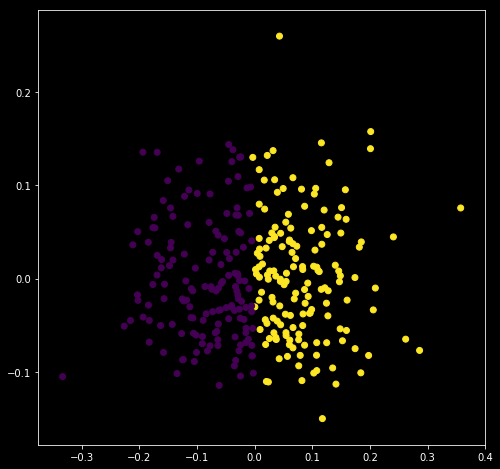

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      84  65
1      55  99


In [21]:
# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

In [23]:
silhouette_score(X, y_pred)

0.30397913007584831

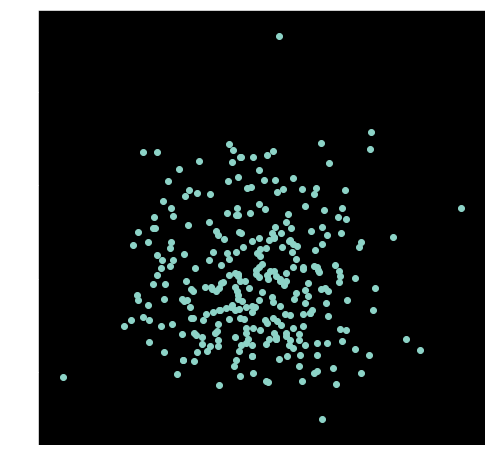

In [17]:
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.show()

In [7]:
# Each batch will be made up of 200 data points.
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=200)
minibatchkmeans.fit(X_pca)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_pca)

# Check the MiniBatch model against our earlier one.
print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, y_pred))

Comparing k-means and mini batch k-means solutions:
col_0    0    1
row_0          
0        0  151
1      149    3


## Drill: More clusters?

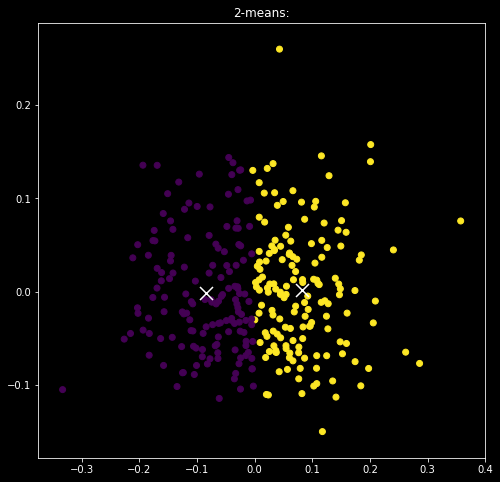

In [10]:
# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

kmeans = KMeans(n_clusters=2, random_state=42)
    
y_pred = kmeans.fit_predict(X_pca)
centroids = kmeans.cluster_centers_

plt.title('2-means:')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)

plt.scatter(centroids[:, 0], centroids[:, 1],
        marker='x', s=169, linewidths=3,
        color='w', zorder=10)

plt.show()

centroidlistx = list(centroids[:, 0])
centroidlisty = list(centroids[:, 1])

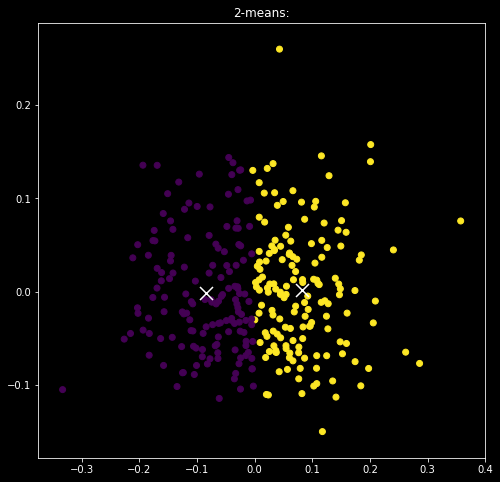

2-means:
col_0   0   1
row_0        
0      84  65
1      55  99
0.303979130076


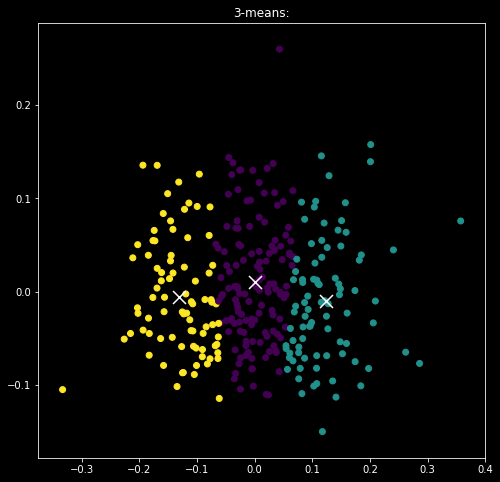

3-means:
col_0   0   1
row_0        
0      65  70
1      25  61
2      49  33
0.179768188877


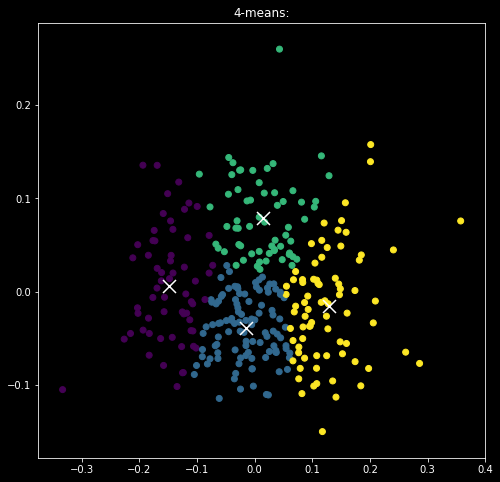

4-means:
col_0   0   1
row_0        
0      40  21
1      37  67
2      42  20
3      20  56
0.176281737185


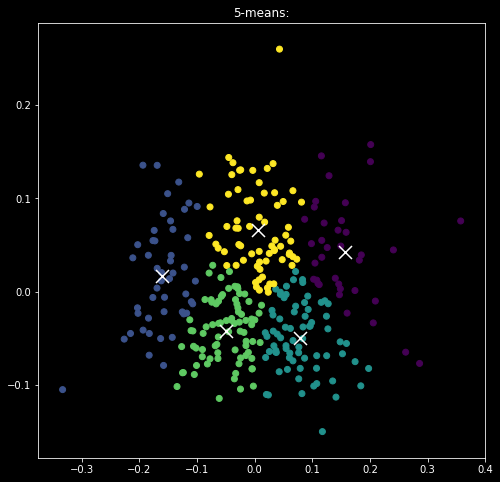

5-means:
col_0   0   1
row_0        
0      15  21
1      36  12
2      14  58
3      34  45
4      40  28
0.141006214471


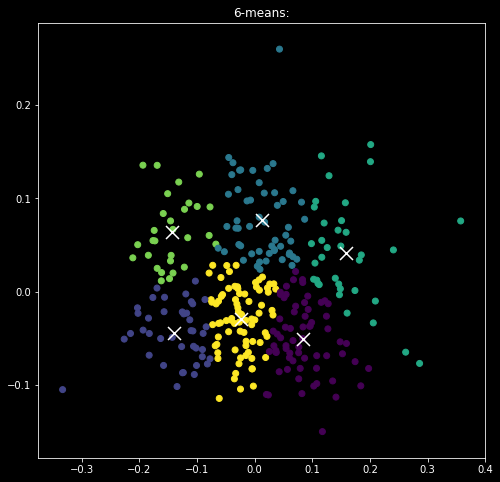

6-means:
col_0   0   1
row_0        
0      14  52
1      20  21
2      34  20
3      14  21
4      23   6
5      34  44
0.145431291962


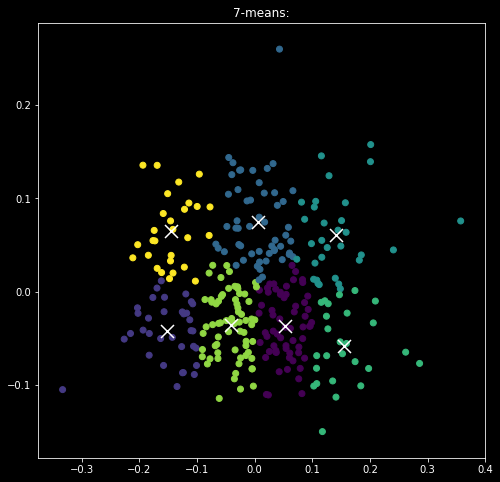

7-means:
col_0   0   1
row_0        
0      14  48
1      19  15
2      34  20
3      16  15
4       3  23
5      31  37
6      22   6
0.120798535369


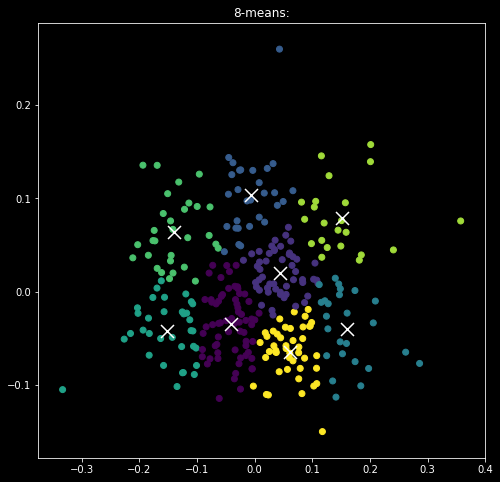

8-means:
col_0   0   1
row_0        
0      32  35
1      22  29
2      17  12
3       5  20
4      19  15
5      24   6
6      12  10
7       8  37
0.106658223951


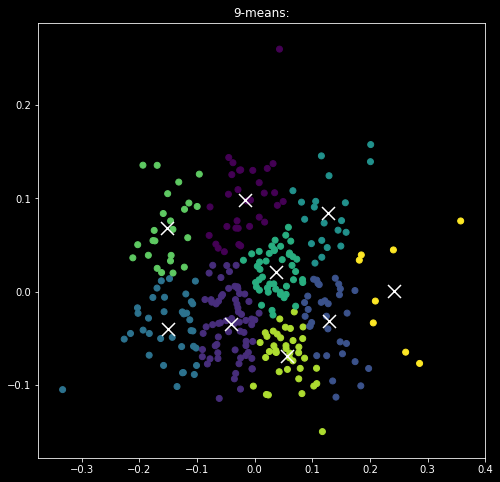

9-means:
col_0   0   1
row_0        
0      19  13
1      32  35
2       8  24
3      20  16
4      13   7
5      20  25
6      20   4
7       6  33
8       1   7
0.0950865621144


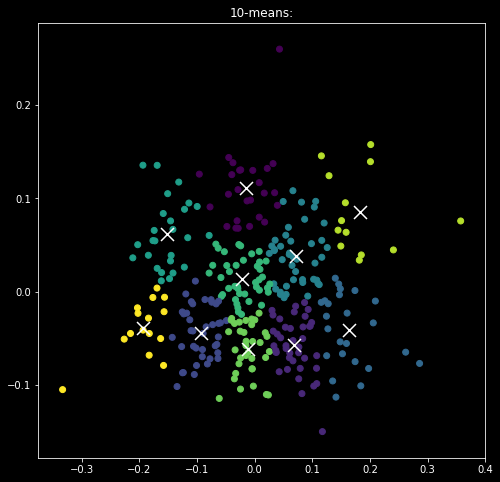

10-means:
col_0   0   1
row_0        
0      15  11
1       7  34
2      15  24
3       4  20
4      23  20
5      20   6
6      23  18
7      14  21
8       7   6
9      11   4
0.0811794473426


In [25]:
kvalues = [3, 4, 5, 6, 7, 8, 9, 10]

for kvalue in kvalues:
    
    kmeans = KMeans(n_clusters=kvalue, random_state=42)
    
    y_pred = kmeans.fit_predict(X_pca)
    centroids = kmeans.cluster_centers_
    centroidlistx = centroidlistx + list(centroids[:, 0])
    centroidlisty = centroidlisty + list(centroids[:, 1])
    
    plt.title('{}-means:'.format(kvalue))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
    
    plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
    
    plt.show()

    # Check the solution against the data.
    print('{}-means:'.format(kvalue))
    print(pd.crosstab(y_pred, y))
    
    print(silhouette_score(X, y_pred))
    


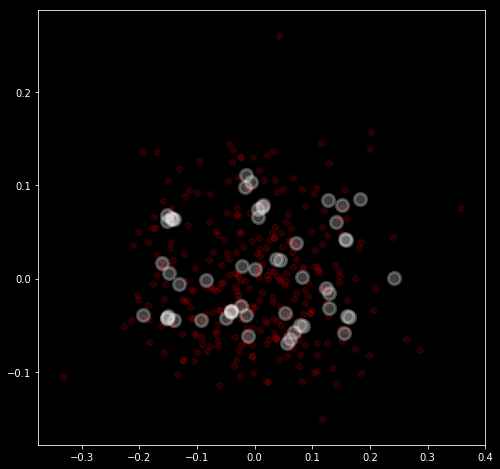

In [12]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], color='r', alpha=0.15)

plt.scatter(centroidlistx, centroidlisty, marker='o', s=150, linewidths=3,
        color='w', alpha=0.25)

plt.show()

15 centroids seems a bit absurd.

Looking only at the initial plot, it seems that there is a higher concentration of data points in the center of the plot, and 2 clusters is insufficient to show this disparity. 6 centroids seems to reflect this pattern more strongly, and it also roughly describes the arrangement of centroids that stay the same through different values for k. 3 centroids could also be a reasonable model, although the centroid in the upper left corner isn't accounted for with a k that low.